# Back propagation algorithm

## Perceptron learning algorithm (Recap)

<img src="imgs/perceptron.png">

Output is simply:
$$ y(x) = \mathbf{w^tx} $$

The classifying hyperplane is simply $ y(x) = 0 $. $\mathbf{w}$ is therefore the normal vector to the classifying plane. Let's use this geometric interpretation to understand the perceptron learning algorithm (and later on backpropagation algorithm).

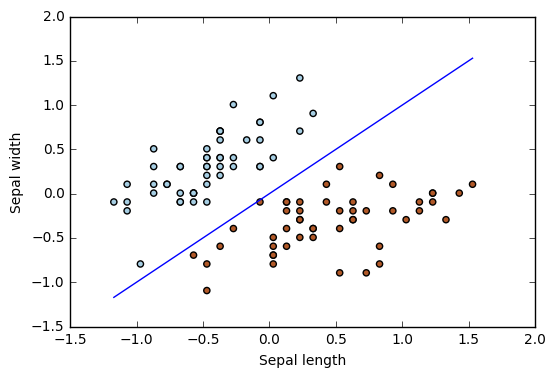

In [16]:
# Import libraries
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Import some data to play 
iris = datasets.load_iris()
X = iris.data[:100,:2]  # we only take 10 samples of the first two features.
Y = iris.target[:100]

# Let's cheat a bit (center the distribution)
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])

# Line parameters
m = 1 # Slope
c = 0  # Intercept

# Creating line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y1 = m*x1 + c

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x1,y1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [24]:
# Create perceptron
threshold = 0

# Get weights using the line equations from above
w2 = 0.25
w1 = -1 * w2 * m

# Perceptron calculation
plant_class = ((X[:,0] * w1 + X[:,1] * w2) < threshold) + 0

# Compare
correctly_classified = np.all(plant_class == Y)

In [25]:
correctly_classified

True

## Solution space

<img src="imgs/solution-space.gif">